# Projeto 1 - Introdução Ciências de Dados

Dupla: Rubens Lima(rnl2) e Caio Possídio (cpv)

## Passo 1 - Coleta de Dados
Para a coleta de dados utilizamos um csv do Kaggle do dataset do FC 24

Primeiramente vamos importat a biblioteca de pandas

In [44]:
import pandas as pd
import numpy as np

In [45]:
# @title E agora vamos importar a nosso dataset
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/My Drive/datasets/fifa_datasets/male_players.csv')

df.head()

<ipython-input-46-857ba279ec0b>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/datasets/fifa_datasets/male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [47]:
positions = {position for position in df['player_positions']}
set(positions)

{'RWB, LM',
 'CB, LB, CDM, CM',
 'CM, RW, RM',
 'ST, LM, RM',
 'LM, RM',
 'CF, CAM, RM, CM',
 'CM, CDM, LM, RM',
 'CM, CAM, LM, CDM',
 'LW, CAM, CM, LB',
 'RW, CAM, LW, CF',
 'RB, LB, RW, CDM',
 'LW, CM, RW',
 'LW, LB, RW',
 'ST, LM, RM, CAM',
 'LM, CAM, LB, CM',
 'CM, RWB, RB',
 'CDM, CB, CM, LB',
 'RB, LWB, LB',
 'CAM, CF, ST, CM',
 'LM, CAM, LW, CM',
 'LB, CM, RW, LW',
 'RM, LM, LWB',
 'RM, CAM, LM, CM',
 'LB, LM, CDM',
 'LWB, RWB, CM',
 'LB, RB, CM',
 'CAM, ST, CDM',
 'RW, LM, CDM',
 'LM, CAM, LWB',
 'LM, ST, LB, LWB',
 'RM, RB, CM, RW',
 'LB, RB, RWB',
 'CM, LM, LB, CF',
 'RB, CDM, RWB, LB',
 'CM, CDM, CAM',
 'RM, LW, LM, RW',
 'LW, CAM, ST, LM',
 'RB, LW, LM, RW',
 'LM, ST, LW, RW',
 'LW, LM, CM',
 'LM, CAM, ST, LW',
 'CM, CB, CDM, CAM',
 'CB, LM, CAM',
 'RW, CAM, ST',
 'RM, CF, CDM',
 'LM, RM, LW',
 'RM, LWB, LB',
 'CAM, LM, CDM, CM',
 'RW, LW, ST, RM',
 'LM, CM, ST',
 'LW, CAM, ST',
 'CM, CDM, RM',
 'CAM, LW, CM, RM',
 'CAM, ST, CF, RM',
 'RWB, LM, RM',
 'RB, LB, LM',
 'RWB, LW

## Passo 2 - Pré-Processamento de Dados


### 2.0 - Removendo dados inúteis e Criando classes


#### 2.0.1 - Removendo colunas que não vão ajudar na análise

In [48]:
inutil_labels = [
 'player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'update_as_of',
 'short_name',
 'long_name',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_id',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df = df.drop(inutil_labels, axis=1)
df.head()

,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,"ST, LW",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,...,83,64,38,93,83,84,88.0,26,34,32
1,ST,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,...,86,87,43,96,74,84,87.0,38,47,29
2,"CM, CAM",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,...,92,75,66,88,95,83,88.0,66,70,53
3,"CF, CAM",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,...,90,44,40,91,92,75,96.0,20,35,24
4,"CF, ST",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,...,81,63,39,92,90,85,90.0,43,24,18


#### 2.0.2 - Criando novas classes para dos dados
No dateset que pegamos o valor da posição do jogador poderia ser tanto uma lista de string como um uma string. Além disso também algumas posições de jogadores são muito similares como RDM, CDM e LDM, LB e RB, só alterando o lado do jogador do campo, mas isso não interfere nos valores do calculo da posição do jogador.

Então criamos uma função para simplificar os dados, é retornado uma "normalização" da posição dependendo caso seja uma lista, é pego o


In [49]:
# Selecionado apenas uma posição

positions_dict = {
 'CAM' : "Meia Atacante",
 'CB' : "Zagueiro",
 'CDM' : "Volante",
 'CF' : "Segundo Atacante",
 'CM' : "Meia",
 'LB' : "Lateral",
 'LM' : "Meia Aberto",
 'LW' : "Ponta",
 'LWB' : "Ala",
 'RB' : "Lateral",
 'RM' : "Meia Aberto",
 'RW' : "Ponta",
 'RWB' : "Ala",
 'ST' : "Atacante",
 "GK" : "Goleiro"
}

def select_prefeer_position(data:str):
  if "," in data:
    data =  data.split(",")[0]
  return positions_dict[data]
df["player_positions"] =  df["player_positions"].apply(select_prefeer_position)



#### 2.0.3 - Removendo os goleiro
Os goleiros possuem atributos próprios degoleiro, tendo seu Overall definido por eles, não levando em conta os outros atributos

In [50]:
# Removendo os goleiros
df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df.head(10)

,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,Atacante,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,...,83,64,38,93,83,84,88.0,26,34,32
1,Atacante,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,...,86,87,43,96,74,84,87.0,38,47,29
2,Meia,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,...,92,75,66,88,95,83,88.0,66,70,53
3,Segundo Atacante,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,...,90,44,40,91,92,75,96.0,20,35,24
4,Segundo Atacante,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,...,81,63,39,92,90,85,90.0,43,24,18
5,Atacante,75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,...,84,81,49,94,81,90,88.0,35,42,19
7,Atacante,69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,...,87,80,42,94,87,92,92.0,46,46,38
8,Ponta,95.0,82.0,78.0,90.0,29.0,68.0,78,89,50,...,80,58,26,87,81,65,79.0,32,25,18
10,Volante,58.0,73.0,80.0,80.0,85.0,84.0,63,64,81,...,82,83,84,75,82,62,85.0,88,87,78
11,Zagueiro,62.0,39.0,66.0,69.0,89.0,87.0,54,29,87,...,26,93,86,39,51,45,81.0,91,91,87


### 2.1 - Defininição de Tipos

In [51]:
# @markdown Vamos primeiramente identificar quais os tipos de dados que temos no nosso datastet
print("Tipos no dataset")
print(df.dtypes)

# @markdown Verificamos que nossos dados possuem object (as classes), e tipos numéricoscomo int64 e float64, mas queremos apenas int64

# @markdown Mas antes de fazermos a conversão, vamos identificar se precisamos fazer uma limpeza de dados

# @markdown Vmaos verificar agora se em players_positions há apenas str
print(df['player_positions'].apply(type).value_counts())

# @markdown Podemos observar que só há itens que são do tipo str, logo todos os dados da coluna são String e não precisamos mais de tratamento


Tipos no dataset
player_positions                object
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed            int64
movement_agility                 int64
movement_reactions               int64
movement_balance                 int64
power_shot_power                 int64
power_jumping                    int64
power_stamina                    int64
power_st

### 2.2 - Tratamento de dados ausentes

#### 2.2.1 - Verificando se há arquivos NaN ou nulos no dataframe

In [52]:
# Verificarndo valores NaN
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

# Verificando valores Infinitos
numeric_cols = df.select_dtypes(include=[np.number]).columns

has_inf = np.isinf(df[numeric_cols].values).any()
print(f"Existem valores infinitos no DataFrame? {has_inf}")

Existem valores NaN no DataFrame? True
Existem valores infinitos no DataFrame? False


#### 2.2.2 - Removendo NaN por mediana nos campos

In [53]:
# Vamos criar um df com os dados originais mas com um drop pos  itens NaN
df_without_nan = df.dropna()

# Preencher valores ausentes com a mediana nas colunas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verificando se ainda temos NaN no dataset
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

Existem valores NaN no DataFrame? False


### 2.3 - Normalização e Discretização

No caso a Discretização não se aplica ao nosso dataset

In [62]:
#@title 2.3.2 - Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### 2.4 - Limpeza de Dados

#### 2.4.1 - Univariado: Identificação e tratamento de outliers

In [63]:
df['pace'].describe()

count    159997.000000
mean          0.619195
std           0.145577
min           0.000000
25%           0.539474
50%           0.631579
75%           0.723684
max           1.000000
Name: pace, dtype: float64

<Axes: >

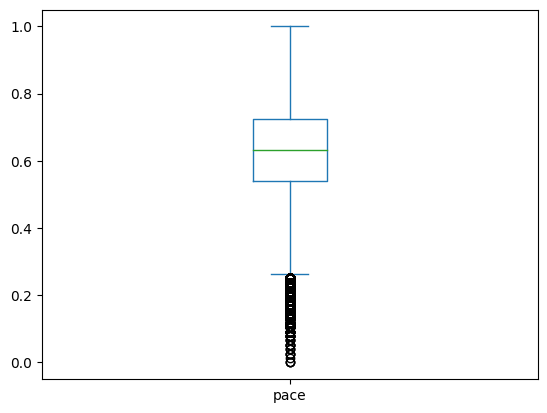

In [64]:
df['pace'].plot.box()

<Axes: >

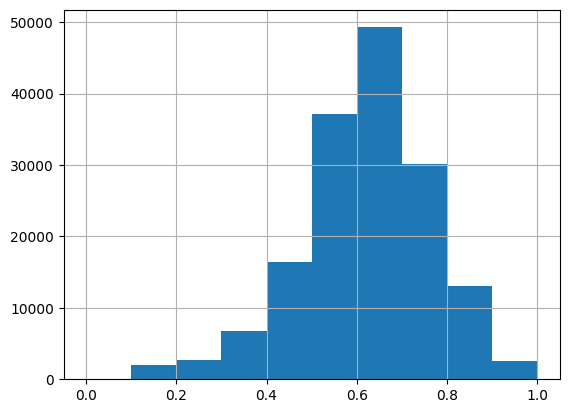

In [65]:
df['pace'].hist()

In [41]:
# Definimos outliers como valores fora de 1.5 * IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [42]:

# Bivariado: Análise de correlação entre pares de colunas
correlation_matrix = df[numeric_cols].corr()
print("\nMatriz de correlação bivariada:")
print(correlation_matrix)



Matriz de correlação bivariada:
                                 pace  shooting   passing  dribbling  \
pace                         1.000000  0.348714  0.284849   0.542698   
shooting                     0.348714  1.000000  0.646954   0.767127   
passing                      0.284849  0.646954  1.000000   0.824222   
dribbling                    0.542698  0.767127  0.824222   1.000000   
defending                   -0.291408 -0.423804  0.143252  -0.181176   
physic                      -0.176058 -0.000049  0.140052  -0.034900   
attacking_crossing           0.424816  0.504365  0.829419   0.734858   
attacking_finishing          0.364011  0.961523  0.531799   0.708911   
attacking_heading_accuracy  -0.261243  0.072026  0.018193  -0.074705   
attacking_short_passing      0.154947  0.514624  0.911886   0.706484   
attacking_volleys            0.306426  0.872008  0.587394   0.690683   
skill_dribbling              0.531709  0.760243  0.771204   0.976783   
skill_curve                  0.